In [2]:
import os
import dill
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline


In [3]:
df1 = pd.read_csv("../../select_BL/selected.csv")
df2 = pd.read_csv('summary.csv')

In [4]:
# Set the path to the BondLengths directory
bond_lengths_path = os.path.abspath("../")

# Regex pattern to match folders in the format "completed_BL_\d+p\d+"
pattern = re.compile(r"^completed_BL_\d+p\d+$")

# Initialize a list to store results
fun_values = []

# Iterate through all items in the BondLengths directory
for item in sorted(os.listdir(bond_lengths_path)):
    # Check if the item matches the pattern and is a directory
    if pattern.match(item) and os.path.isdir(os.path.join(bond_lengths_path, item)):
        folder_path = os.path.join(bond_lengths_path, item, "vqe_result.pkl")
        
        # Read the .pkl file and extract res['fun']
        try:
            with open(folder_path, "rb") as file:
                res = dill.load(file)
                fun_values.append(res['fun'])
        except Exception as e:
            print(f"Error reading {folder_path}: {e}")

# Create a DataFrame from the collected fun values
df3 = pd.DataFrame(fun_values, columns=['optim_fun'])

In [5]:
# Concatenate the columns from the second DataFrame to the first DataFrame
df = pd.concat([df1, df2, df3], axis=1)
df

,BL,Completed,Naive (est),Naive (err_bound),IAE without Bayesian (est),IAE without Bayesian (err_bound),IAE with Bayesian (est),IAE with Bayesian (err_bound),Naive_fixed_shots (est),Naive_fixed_shots (err_bound),Naive (total_sc),IAE without Bayesian (total_sc),IAE with Bayesian (total_sc),optim_fun
0,0.60,0,-29.722655,0.004023,-29.724048,0.002887,-29.721692,0.003974,-29.583700,0.110563,18650158250,15237782.05,13370445.75,-29.725334
1,0.66,1,-29.322300,0.004023,-29.323759,0.002852,-29.321227,0.003971,-29.181022,0.114004,18657458100,15095466.60,13359881.45,-29.325015
2,0.75,0,-28.788418,0.004016,-28.789666,0.002921,-28.787370,0.004013,-28.649912,0.115694,18671779450,14883591.75,13279368.70,-28.791124
3,0.99,0,-27.691251,0.003954,-27.692636,0.002888,-27.690529,0.003936,-27.562996,0.116282,18756969500,15050982.05,13358455.70,-27.693853
4,1.12,1,-27.245971,0.003910,-27.247297,0.002848,-27.245076,0.003865,-27.119702,0.116915,18847546300,15051717.45,13391037.70,-27.248534
5,1.58,1,-26.197242,0.003746,-26.198650,0.002694,-26.196194,0.003760,-26.066041,0.120890,19452805200,15750769.40,13956140.25,-26.199733
6,2.04,1,-25.626305,0.003516,-25.627109,0.002612,-25.625210,0.003628,-25.490979,0.124328,19994384800,15418628.30,13673577.30,-25.629085
7,2.50,1,-25.281001,0.002874,-25.282080,0.001942,-25.279683,0.003257,-25.133676,0.107994,18985729000,15022858.20,13246067.00,-25.283962
8,3.00,0,-25.033158,0.002844,-25.035344,0.001865,-25.031768,0.003233,-24.885160,0.113059,20256426750,16300904.45,14308313.60,-25.036101
9,3.50,0,-24.856569,0.002755,-24.856241,0.001817,-24.855308,0.003159,-24.707407,0.111089,19777787450,16151597.75,14183163.70,-24.859542


In [6]:
# Calculate improvement percentages
improvement_percentages = [(val2 - val3) / val2 * 100 for val2, val3 in zip(df['IAE without Bayesian (total_sc)'], df['IAE with Bayesian (total_sc)'])]

C:\Users\qilin\AppData\Local\Temp\ipykernel_39440\4237695841.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


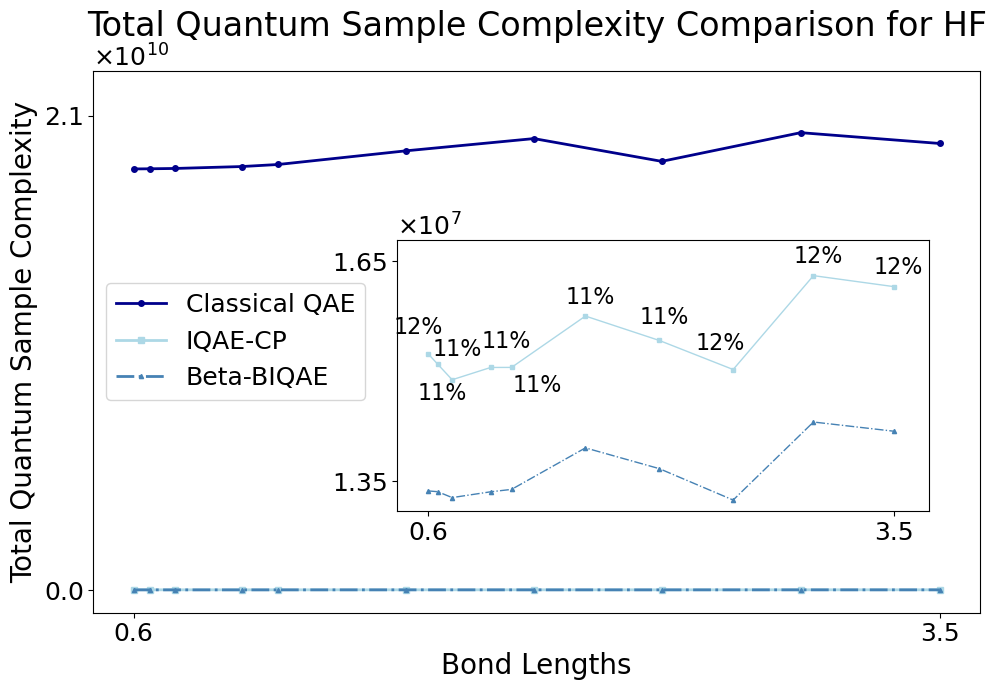

In [7]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Create main plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot three curves
ax.plot(df['BL'], df['Naive (total_sc)'], label='Classical QAE', marker='o', color='#00008b', linewidth=2, markersize=4)
ax.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=2, markersize=4)
ax.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=2, markersize=3)

# Axis labels and title
ax.set_xlabel('Bond Lengths', fontsize=20)
ax.set_ylabel('Total Quantum Sample Complexity', fontsize=20)
ax.set_title('Total Quantum Sample Complexity Comparison for HF', fontsize=24)
ax.legend(loc='center left', fontsize=18)

# Create inset plot
ax_inset = inset_axes(ax, width="100%", height="100%", loc="upper right",
                      bbox_to_anchor=(0.35, 0.2, 0.6, 0.5), bbox_transform=ax.transAxes)

ax_inset.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=1, markersize=3)
ax_inset.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=1, markersize=3)

# Adjust inset axis limits
ax_inset.set_xlim([ax_inset.get_xlim()[0] - 0.05, ax_inset.get_xlim()[1] * 1.02])
ax_inset.set_ylim([ax_inset.get_ylim()[0] - 0.05, ax_inset.get_ylim()[1] * 1.02])

# Main plot ticks and fonts
ax.set_xticks([df['BL'].iloc[0], np.float64(3.5)])
ax.set_yticks([np.float64(0.0), np.float64(2.1e10)])
ax.set_ylim(top=2.3*10**10)
ax.tick_params(axis='both', labelsize=18)

# Inset ticks and fonts
ax_inset.set_yticks([np.float64(1.35e7), np.float64(1.65e7)])
# ax_inset.set_xticks(np.arange(0.5, 4.0, 3.0))
ax_inset.set_xticks([np.float64(0.6), np.float64(3.5)])
ax_inset.set_xticklabels([np.float64(0.6), np.float64(3.5)])  # Hide x-tick labels
ax_inset.tick_params(axis='both', labelsize=18)

# Scientific notation formatting
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_inset.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_inset.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Format scientific offset font size
ax.yaxis.offsetText.set_fontsize(18)
ax_inset.yaxis.offsetText.set_fontsize(18)

# Move y-axis of inset to the left
ax_inset.yaxis.tick_left()
ax_inset.yaxis.set_label_position("left")

# Annotate improvement percentages
x_offsets = [-0.06, 0.03, 0.03, 0.1, 0.16, 0.03, 0.03, -0.08, 0.03, 0.03]
y_offsets = [2e5, -5.5e5, 2.5e5, 2e5, -4.0e5, 1e5, 1.5e5, 2e5, 1e5, 1e5]

for i, (x, y, improvement) in enumerate(zip(df['BL'], df['IAE without Bayesian (total_sc)'], improvement_percentages)):
    ax_inset.text(x + x_offsets[i], y + y_offsets[i], f"{improvement:.0f}%", 
                  ha='center', va='bottom', fontsize=16)

# Save and show
plt.tight_layout()
plt.savefig('total_sc.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### 2 Plot the Estimated Curves

In [8]:
# Loading the CSV file
df_curve = pd.read_csv('../../exact_curve/exact_curve.csv')

# Calculating the Total Energy
df_curve['TE'] = df_curve['NRE'] + df_curve['EE']

In [9]:
# Merge df and df_curve on 'BL' with left join
df_merged = df.merge(df_curve[['BL', 'NRE']], on='BL', how='left')

# Find rows where 'NRE' is missing (NaN)
mask = df_merged['NRE'].isna()

# Prepare interpolation arrays from df_curve
x = df_curve['BL']
y = df_curve['NRE']

# Interpolate 'NRE' values for missing entries based on 'BL'
interpolated_nre = np.interp(df_merged.loc[mask, 'BL'], x, y)

# Fill missing 'NRE' with interpolated values
df_merged.loc[mask, 'NRE'] = interpolated_nre


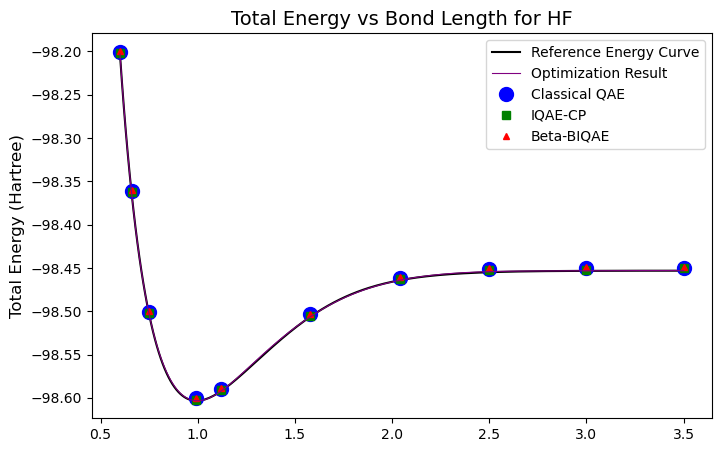

In [10]:


# For optim res
spline_optim_res = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['optim_fun'] + df_merged['NRE'], k=4)
optim_res = spline_optim_res(df_curve['BL'])

# Create a figure with a specified size
plt.figure(figsize=(8, 5))  # Width = 10 inches, height = 6 inches

# Plot the Total Energy curve
plt.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black')
plt.plot(df_curve['BL'], optim_res, label='Optimization Result', color='purple', zorder=5, linewidth=0.8)

# Plot the Naive approach, IQAE, and Bayesian IQAE as dots
plt.plot(df_merged['BL'], df_merged['Naive (est)'] + df_merged['NRE'],
         label='Classical QAE', marker='o', color='blue', linestyle='None', markersize=10)

plt.plot(df_merged['BL'], df_merged['IAE without Bayesian (est)'] + df_merged['NRE'],
         label='IQAE-CP', marker='s', color='green', linestyle='None', markersize=6)

plt.plot(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
         label='Beta-BIQAE', marker='^', color='red', linestyle='None', markersize=4)

# Add labels and legend
#plt.xlabel('Bond Length (Å)', fontsize=12)
plt.ylabel('Total Energy (Hartree)', fontsize=12)
plt.title('Total Energy vs Bond Length for HF', fontsize=14)
plt.legend(fontsize=10)

#plt.ylim(-98.8, -97.8)

# Save the figure
plt.savefig('justify_acc.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### 3 Comparison of Accuracies with Fixed Sample Complexity

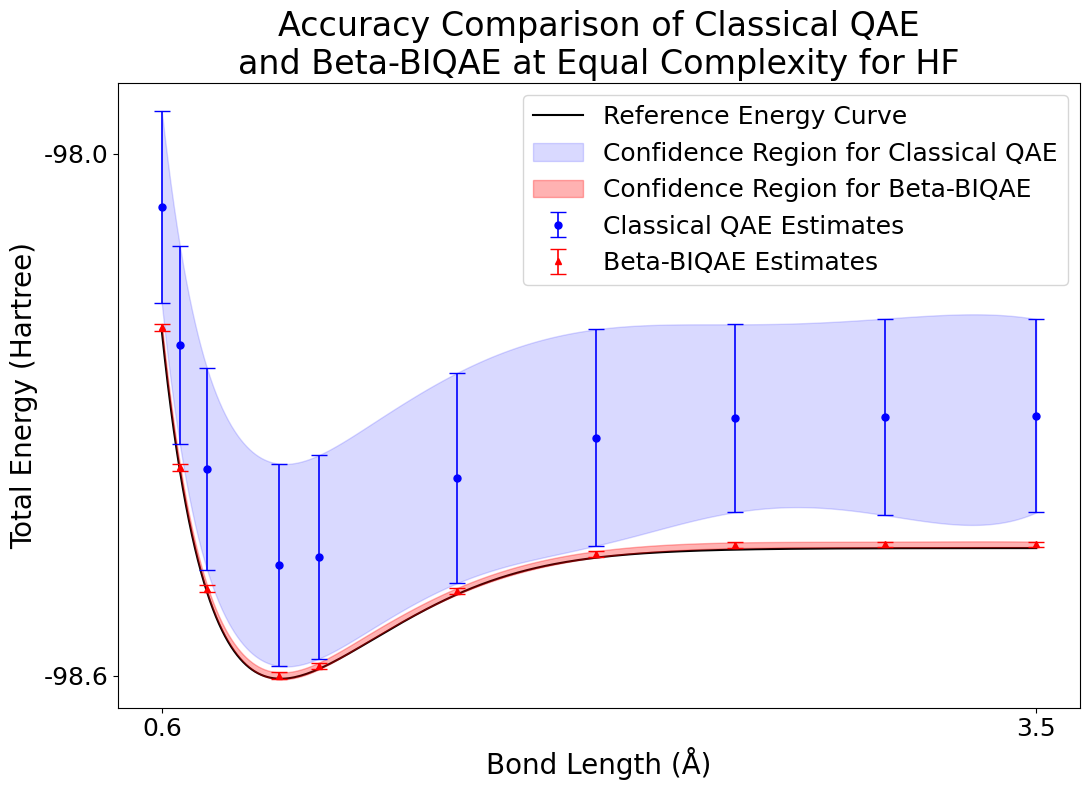

In [11]:
from matplotlib.ticker import FormatStrFormatter
# Create spline functions for the estimates and their error bounds
spline_naive_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'], k=4)
spline_naive_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (err_bound)'], k=4)
spline_bayes_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'], k=4)
spline_bayes_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (err_bound)'], k=4)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(11, 8))  # Slightly larger canvas

# For Naive
naive_est = spline_naive_est(df_curve['BL'])
naive_upper = naive_est + spline_naive_err(df_curve['BL'])
naive_lower = naive_est - spline_naive_err(df_curve['BL'])

# For Bayesian
bayes_est = spline_bayes_est(df_curve['BL'])
bayes_upper = bayes_est + spline_bayes_err(df_curve['BL'])
bayes_lower = bayes_est - spline_bayes_err(df_curve['BL'])

# Plot the reference curve
ax.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black', zorder=1)

# Confidence regions
ax.fill_between(df_curve['BL'], naive_lower, naive_upper, color='blue', alpha=0.15,
                label='Confidence Region for Classical QAE', zorder=2)
ax.fill_between(df_curve['BL'], bayes_lower, bayes_upper, color='red', alpha=0.30,
                label='Confidence Region for Beta-BIQAE', zorder=3)

# Error bars for estimates
ax.errorbar(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'],
            yerr=df_merged['Naive_fixed_shots (err_bound)'],
            fmt='o', label='Classical QAE Estimates', color='blue',
            capsize=6, ecolor='blue', elinewidth=1.2, markersize=5, zorder=4)

ax.errorbar(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
            yerr=df_merged['IAE with Bayesian (err_bound)'],
            fmt='^', label='Beta-BIQAE Estimates', color='red',
            capsize=6, ecolor='red', elinewidth=1.2, markersize=5, zorder=5)

# Title (split in two lines)
ax.set_title('Accuracy Comparison of Classical QAE\nand Beta-BIQAE at Equal Complexity for HF', fontsize=24)

# Axis labels
ax.set_xlabel('Bond Length (Å)', fontsize=20)
ax.set_ylabel('Total Energy (Hartree)', fontsize=20)

# Ticks — only min and max values
ax.set_xticks([df_curve['BL'].min(), df_curve['BL'].max()])
ax.set_yticks([df_curve['TE'].min(), df_curve['TE'].max()])

ax.set_yticks([-98.6, -98.0])
ax.set_yticklabels([-98.6, -98.0], fontsize=18)

# Format y-axis tick labels to 1 decimal place
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Tick label font sizes
ax.tick_params(axis='both', labelsize=18)

# Legend
ax.legend(loc='upper right', fontsize=18)

# Save and show
plt.tight_layout()
plt.savefig('compare_acc.png', dpi=300, bbox_inches='tight')
plt.show()

### 4 Estimates at the Equilibrium Bond Length

In [12]:
equi_row = df_merged[abs(df_merged['BL'] - 0.99) < 0.00001]

print(f"Numpy: {df_curve.loc[abs(df_curve['BL'] - 0.99) < 0.00001, 'TE'].iloc[0]:.3f}")
print(f"Minimization: {equi_row['optim_fun'].iloc[0] + equi_row['NRE'].iloc[0]:.3f}")
print(f"Naive approach: ${equi_row['Naive (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['Naive (err_bound)'].iloc[0]:.3f}$")
print(f"IQAE: ${equi_row['IAE without Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['IAE without Bayesian (err_bound)'].iloc[0]:.3f}$")
print(f"Bayesian IQAE: ${equi_row['IAE with Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['IAE with Bayesian (err_bound)'].iloc[0]:.3f}$")

print("Average multiplicative improvement is: ",sum((naive_upper - naive_lower) / (bayes_upper - bayes_lower)) / len(bayes_lower))

Numpy: -98.603
Minimization: -98.603
Naive approach: $-98.601 \pm 0.004$
IQAE: $-98.602 \pm 0.003$
Bayesian IQAE: $-98.600 \pm 0.004$
Average multiplicative improvement is:  32.83721469099171
